<a href="https://colab.research.google.com/github/pamritha25/Computer-vision/blob/main/Computervision0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computervision**



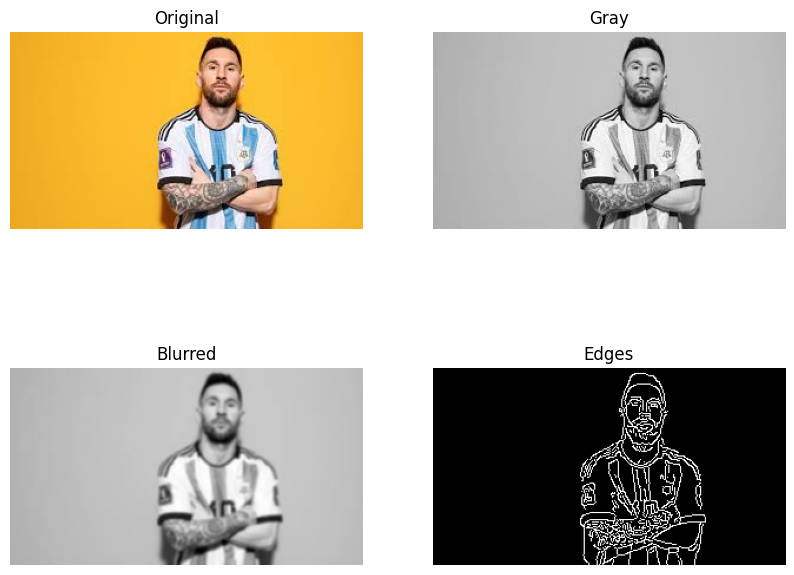

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read an image
image = cv2.imread("/content/messi.image.jfif")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge Detection
edges = cv2.Canny(gray, 100, 200)

# Show results
titles = ['Original', 'Gray', 'Blurred', 'Edges']
images = [image_rgb, gray, blur, edges]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    cmap = 'gray' if i > 0 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

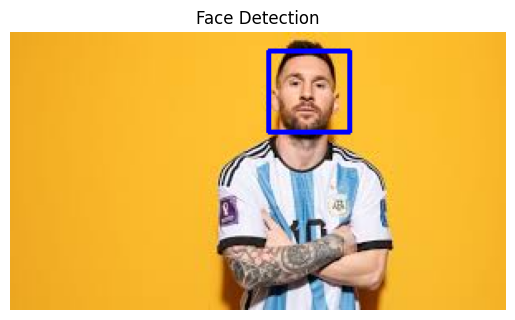

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load pre-trained face detector (Haar cascade)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Read image
img = cv2.imread("/content/messi.image.jfif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Draw rectangles
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Face Detection")
plt.axis('off')
plt.show()

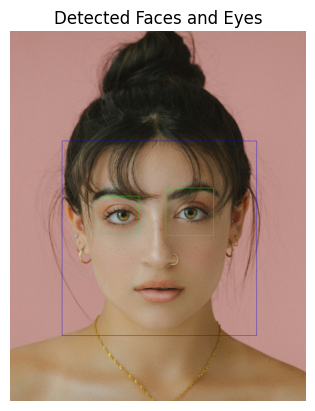

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/content/jimmy-fermin-bqe0J0b26RQ-unsplash.jpg")
# Check if image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the path.")
else:
    face_detector=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_detector=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Check if classifiers were loaded successfully
    if face_detector.empty():
        print("Error: Could not load face cascade. Please check the path.")
    if eye_detector.empty():
        print("Error: Could not load eye cascade. Please check the path.")

    if not face_detector.empty() and not eye_detector.empty():
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            eyes = eye_detector.detectMultiScale(roi_gray)
            for(ex,ey,ew,eh)in eyes:
              cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

        # Convert image to RGB for displaying with matplotlib
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title("Detected Faces and Eyes")
        plt.axis('off')
        plt.show()
    else:
        print("Skipping detection due to classifier loading errors.")